Task-1 Import Libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot import PlotLossesKerasTF
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.7.0


In [2]:
# pip install seaborn

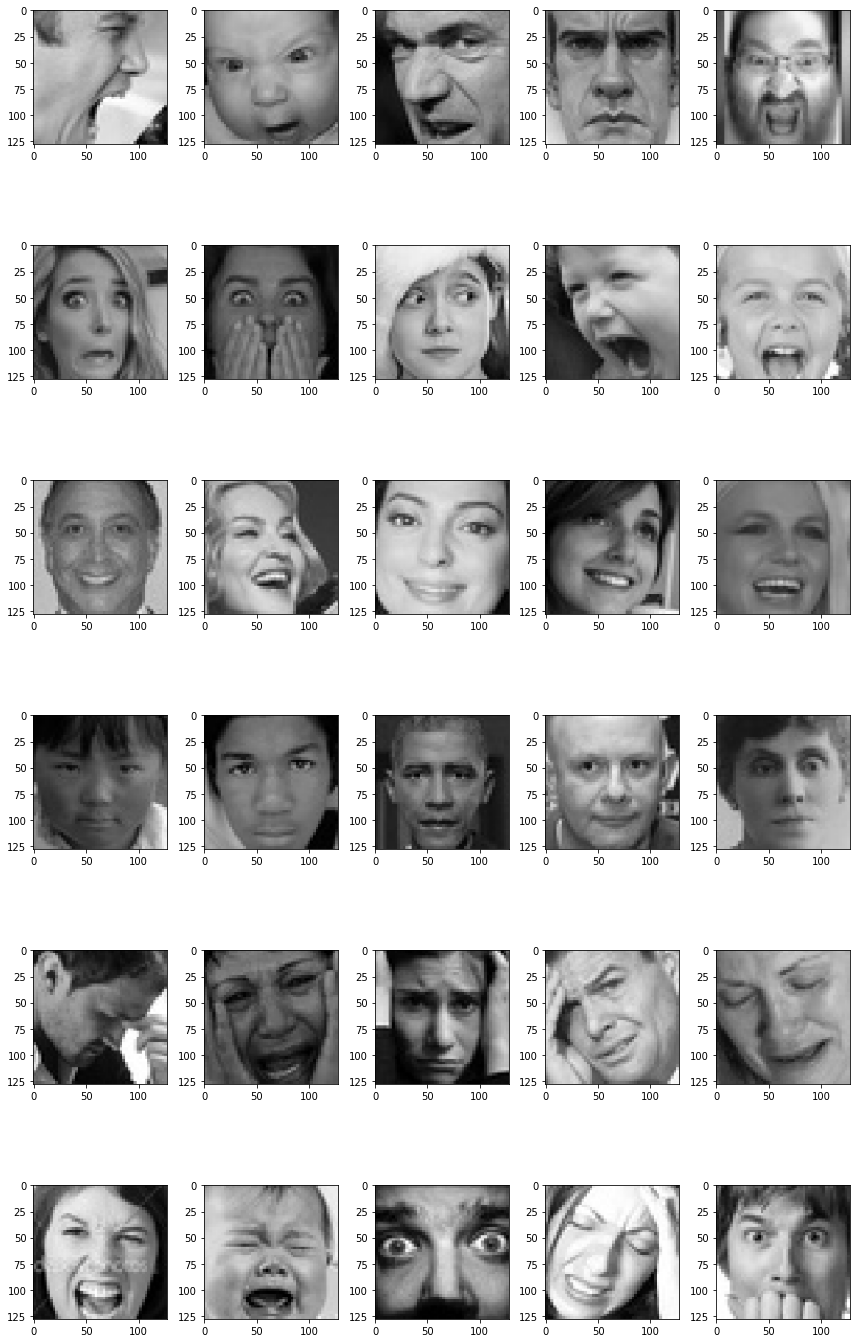

In [3]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img


def plot_example_images(plt):
    img_size = 128
    plt.figure(0, figsize=(12, 20))
    ctr = 0

    for expression in os.listdir("Train/"):
        for i in range(1, 6):
            ctr += 1
            plt.subplot(6, 5, ctr)
            img = load_img("Train/" + expression + "/" + os.listdir("Train/" +
                           expression)[i], target_size=(img_size, img_size))
            plt.imshow(img, cmap="gray")

    plt.tight_layout()
    return plt
plot_example_images(plt).show()

PLOT SAMPLE IMAGES

In [4]:
# plot_example_images(plt).show()

In [5]:
for expression in os.listdir("Train/"):
    print(str(len(os.listdir("Train/" + expression))) + " " + expression + " images")

881 angry images
727 surprise images
1000 Happy images
853 neutral images
947 sad images
826 fear images


Task 3: Generate Training and Validation Batches

In [13]:
img_size = 128
batch_size = 32

datagen_train = ImageDataGenerator(horizontal_flip=True)

train_generator = datagen_train.flow_from_directory("Train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("Test/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

Found 5234 images belonging to 6 classes.
Found 1210 images belonging to 6 classes.


Task 4: Create CNN Model

In [14]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(img_size, img_size,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(6, activation='sigmoid'))

opt = Adam(lr=0.0002)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      640       
                                                                 
 batch_normalization_6 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 64, 64, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 128)      

/home/computer/anaconda3/envs/mcgan/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Task 6: Train and Evaluate Model

In [15]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard


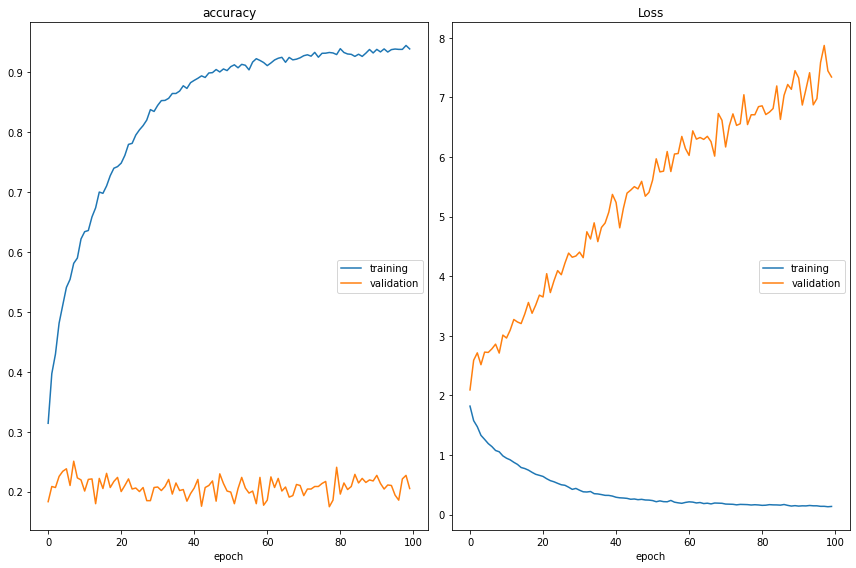

accuracy
	training         	 (min:    0.314, max:    0.945, cur:    0.939)
	validation       	 (min:    0.175, max:    0.251, cur:    0.205)
Loss
	training         	 (min:    0.131, max:    1.820, cur:    0.136)
	validation       	 (min:    2.092, max:    7.872, cur:    7.343)

Epoch 00100: saving model to model_weights
163/163 [==============================] - 6s 39ms/step - loss: 0.1359 - accuracy: 0.9391 - val_loss: 7.3425 - val_accuracy: 0.2052 - lr: 1.0000e-04
CPU times: user 13min 57s, sys: 1min 1s, total: 14min 59s
Wall time: 10min 40s


In [16]:
%%time
datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory("Train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)


validation_generator = datagen_train.flow_from_directory("Test/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

epochs = 100

steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.0001, mode='auto')
checkpoint = ModelCheckpoint("model_weights", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)

earlyStop = EarlyStopping(
    monitor='val_loss',
    patience=8,
    verbose=1,
    mode='min',
    restore_best_weights=True,
)

callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr]
history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)

In [17]:
# import cv2
# from model import FacialExpressionModel
# import numpy as np

# facec = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# model = FacialExpressionModel("model.json", "model_weights.h5")
# font = cv2.FONT_HERSHEY_SIMPLEX


# class VideoCamera(object):
#     def __init__(self):
#         self.video = cv2.VideoCapture(0)

#     def __del__(self):
#         self.video.release()

#     # returns camera frames along with bounding boxes and predictions
#     def get_frame(self):
#         _, fr = self.video.read()
#         gray_fr = cv2.cvtColor(fr, cv2.COLOR_BGR2GRAY)
#         faces = facec.detectMultiScale(gray_fr, 1.3, 5)

#         for (x, y, w, h) in faces:
#             fc = gray_fr[y:y+h, x:x+w]

#             roi = cv2.resize(fc, (48, 48))
#             pred = model.predict_emotion(roi[np.newaxis, :, :, np.newaxis])

#             cv2.putText(fr, pred, (x, y), font, 1, (255, 255, 0), 2)
#             cv2.rectangle(fr, (x, y), (x+w, y+h), (255, 0, 0), 2)

#         _, jpeg = cv2.imencode('.jpg', fr)
#         return jpeg.tobytes()

In [18]:
# just to map o/p values 
x=train_generator
train_generator = datagen_train.flow_from_directory("Train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)
op = ( x.class_indices.values(),x.class_indices.keys())

Found 5234 images belonging to 6 classes.


In [ ]:
import os
import cv2
import numpy as np
from tensorflow import keras

from keras.preprocessing import image
import warnings
warnings.filterwarnings("ignore")
from keras.preprocessing.image import load_img, img_to_array 
from keras.models import  load_model
import matplotlib.pyplot as plt
import numpy as np

# load model
model = load_model("best_model.h5")


face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


cap = cv2.VideoCapture(0)

while True:
    ret, test_img = cap.read()  # captures frame and returns boolean value and captured image
    if not ret:
        continue
    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)

    for (x, y, w, h) in faces_detected:
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), thickness=7)
        roi_gray = gray_img[y:y + w, x:x + h]  # cropping region of interest i.e. face area from  image
        roi_gray = cv2.resize(roi_gray, (224, 224))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis=0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        # find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ', resized_img)

    if cv2.waitKey(10) == ord('q'):  # wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows

: 